# Deutsch-Jozsa algorithm

***

In [1]:
# Qiskit itself.
import qiskit
# Aer provider, simulator.
import qiskit.providers.aer as aer

In [2]:
# Plotting.
import matplotlib.pyplot as plt
# Change the style.
plt.style.use('ggplot')

<br>

## $f(x_1, x_2) = 0$

***

$\begin{array}{cccc}
  x_1 & x_2 & y & f(x_1,x_2) & y \oplus f(x_1,x_2) & y\\
  \hline                      
   0  &  0  & 0 &      0     &       0             & 0\\
   0  &  0  & 1 &      0     &       1             & 1\\
   0  &  1  & 0 &      0     &       0             & 0\\
   0  &  1  & 1 &      0     &       1             & 1\\
   1  &  0  & 0 &      0     &       0             & 0\\
   1  &  0  & 1 &      0     &       1             & 1\\
   1  &  1  & 0 &      0     &       0             & 0\\
   1  &  1  & 1 &      0     &       1             & 1\\
\end{array}$

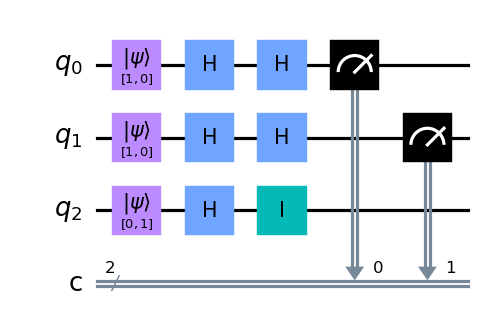

In [3]:
# Create a circuit with three qubits and two classical bits.
circuit = qiskit.QuantumCircuit(3, 2)

# Initialize first qubit to 0.
circuit.initialize([1, 0], 0)
# Initialize second qubit to 0.
circuit.initialize([1, 0], 1)
# Initialize third qubit to 1.
circuit.initialize([0, 1], 2)

# Apply Hadamard gate to all qubits.
circuit.h((0, 1, 2))

# Apply identity to third qubit.
circuit.i(2)

# Apply Hadamard to qubits 0 and 1.
circuit.h((0, 1))

# Measure qubits 0 and 1.
circuit.measure(0, 0)
circuit.measure(1, 1)

# Draw the circuit.
circuit.draw(output='mpl', scale=1.6)

### Simulate

***

{'00': 1000}


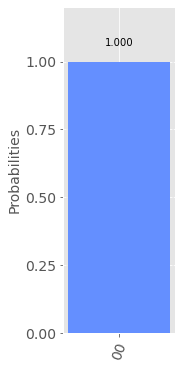

In [4]:
# Create simulation.
simulator = aer.QasmSimulator()

# Compile the circuit for the simulator.
compiled_circuit = qiskit.transpile(circuit, simulator)

# Run the simulated circuit 1000 times.
job = simulator.run(compiled_circuit, shots=1000)

# Get the 1000 results.
result = job.result()

# Get the counts.
counts = result.get_counts(circuit)

# Print the counts.
print(counts)

# Plot histogram of counts.
qiskit.visualization.plot_histogram(counts, figsize=(2,6))

<br>

## $f(x_1, x_2) = 1$

***


$\begin{array}{ccc|c|c|c}
  x_1 & x_2 & y & f(x_1,x_2) & y \oplus f(x_1,x_2) & \neg y\\
  \hline                      
   0  &  0  & 0 &      1     &       1             & 1\\
   0  &  0  & 1 &      1     &       0             & 0\\
   0  &  1  & 0 &      1     &       1             & 1\\
   0  &  1  & 1 &      1     &       0             & 0\\
   1  &  0  & 0 &      1     &       1             & 1\\
   1  &  0  & 1 &      1     &       0             & 0\\
   1  &  1  & 0 &      1     &       1             & 1\\
   1  &  1  & 1 &      1     &       0             & 0\\
\end{array}$

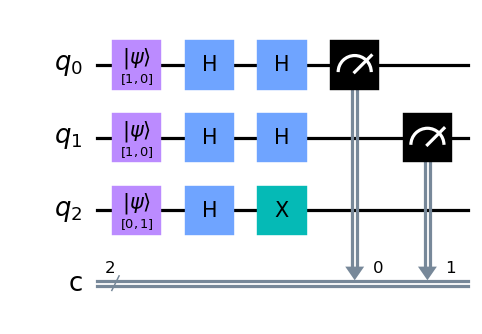

In [5]:
# Create a circuit with three qubits and two classical bits.
circuit = qiskit.QuantumCircuit(3, 2)

# Initialize first qubit to 0.
circuit.initialize([1, 0], 0)
# Initialize second qubit to 0.
circuit.initialize([1, 0], 1)
# Initialize third qubit to 1.
circuit.initialize([0, 1], 2)

# Apply Hadamard gate to all qubits.
circuit.h((0, 1, 2))

# Apply X to third qubit.
circuit.x(2)

# Apply Hadamard to qubits 0 and 1.
circuit.h((0, 1))

# Measure qubits 0 and 1.
circuit.measure(0, 0)
circuit.measure(1, 1)

# Draw the circuit.
circuit.draw(output='mpl', scale=1.6)


### Simulate

***

{'00': 1000}


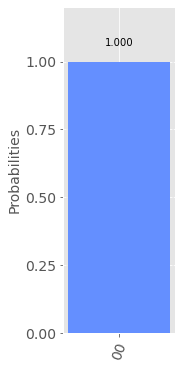

In [6]:
# Create simulation.
simulator = aer.QasmSimulator()

# Compile the circuit for the simulator.
compiled_circuit = qiskit.transpile(circuit, simulator)

# Run the simulated circuit 1000 times.
job = simulator.run(compiled_circuit, shots=1000)

# Get the 1000 results.
result = job.result()

# Get the counts.
counts = result.get_counts(circuit)

# Print the counts.
print(counts)

# Plot histogram of counts.
qiskit.visualization.plot_histogram(counts, figsize=(2,6))

<br>

## $f(0, 0) = 0, f(0, 1) = 1, f(1, 0) = 1, f(1, 1) = 0$

***


$\begin{array}{ccc|c|c|c}
  x_1 & x_2 & y & f(x_1,x_2) & y \oplus f(x_1,x_2) & x_2 \oplus (x_1 \oplus y)\\
  \hline                      
   0  &  0  & 0 &      0     &       0             & 0\\
   0  &  0  & 1 &      0     &       1             & 1\\
   0  &  1  & 0 &      1     &       1             & 1\\
   0  &  1  & 1 &      1     &       0             & 0\\
   1  &  0  & 0 &      1     &       1             & 1\\
   1  &  0  & 1 &      1     &       0             & 0\\
   1  &  1  & 0 &      0     &       0             & 0\\
   1  &  1  & 1 &      0     &       1             & 1\\
\end{array}$

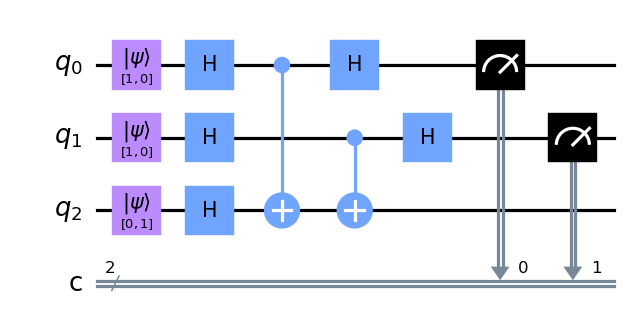

In [7]:
# Create a circuit with three qubits and two classical bits.
circuit = qiskit.QuantumCircuit(3, 2)

# Initialize first qubit to 0.
circuit.initialize([1, 0], 0)
# Initialize second qubit to 0.
circuit.initialize([1, 0], 1)
# Initialize third qubit to 1.
circuit.initialize([0, 1], 2)

# Apply Hadamard gate to all qubits.
circuit.h((0, 1, 2))

# Apply CNOT to x_1 and y.
circuit.cnot(0, 2)
# Apply CNOT to x_2 and y.
circuit.cnot(1, 2)

# Apply Hadamard to qubits 0 and 1.
circuit.h((0, 1))

# Measure qubits 0 and 1.
circuit.measure(0, 0)
circuit.measure(1, 1)

# Draw the circuit.
circuit.draw(output='mpl', scale=1.6)


### Simulate

***

{'11': 1000}


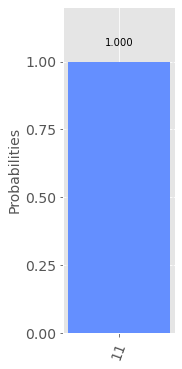

In [8]:
# Create simulation.
simulator = aer.QasmSimulator()

# Compile the circuit for the simulator.
compiled_circuit = qiskit.transpile(circuit, simulator)

# Run the simulated circuit 1000 times.
job = simulator.run(compiled_circuit, shots=1000)

# Get the 1000 results.
result = job.result()

# Get the counts.
counts = result.get_counts(circuit)

# Print the counts.
print(counts)

# Plot histogram of counts.
qiskit.visualization.plot_histogram(counts, figsize=(2,6))

<br>

## Why it works

***

$
A = 
\begin{bmatrix}
1 \\
0
\end{bmatrix}
\otimes
\begin{bmatrix}
1 \\
0
\end{bmatrix}
\otimes
\begin{bmatrix}
0 \\
1
\end{bmatrix}
=
\begin{bmatrix}
1 \\
0
\end{bmatrix}
\otimes
\begin{bmatrix}
0 \\
1 \\
0 \\
0
\end{bmatrix}
=
\begin{bmatrix}
0 \\
1 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0
\end{bmatrix}
$

***

$
B = 
H \otimes H \otimes H =
\frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}
\otimes
\frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}
\otimes
\frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}
=
\frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}
\otimes
\frac{1}{2}
\begin{bmatrix}
1 & 1 & 1 & 1 \\
1 & -1 & 1 & -1 \\
1 & 1 & -1 & -1 \\
1 & -1 & -1 & 1
\end{bmatrix}
=
\frac{1}{2\sqrt{2}}
\begin{bmatrix}
 1 &  1 &  1 &  1 &  1 &  1 &  1 &  1 \\
 1 & -1 &  1 & -1 &  1 & -1 &  1 & -1 \\
 1 &  1 & -1 & -1 &  1 &  1 & -1 & -1 \\
 1 & -1 & -1 &  1 &  1 & -1 & -1 &  1 \\
 1 &  1 &  1 &  1 & -1 & -1 & -1 & -1 \\
 1 & -1 &  1 & -1 & -1 &  1 & -1 &  1 \\
 1 &  1 & -1 & -1 & -1 & -1 &  1 &  1 \\
 1 & -1 & -1 &  1 & -1 &  1 &  1 & -1 \\
\end{bmatrix}
$

***

$
C = 
H \otimes H \otimes I =
\frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}
\otimes
\frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}
\otimes
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
=
\frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}
\otimes
\frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 0 & 1 & 0 \\
0 & 1 & 0 & 1 \\
1 & 0 & -1 & 0 \\
0 & 1 & 0 & -1
\end{bmatrix}
=
\frac{1}{2}
\begin{bmatrix}
 1 &  0 &  1 &  0 &  1 &  0 &  1 &  0 \\
 0 &  1 &  0 &  1 &  0 &  1 &  0 &  1 \\
 1 &  0 & -1 &  0 &  1 &  0 & -1 &  0 \\
 0 &  1 &  0 & -1 &  0 &  1 &  0 & -1 \\
 1 &  0 &  1 &  0 & -1 &  0 & -1 &  0 \\
 0 &  1 &  0 &  1 &  0 & -1 &  0 & -1 \\
 1 &  0 & -1 &  0 & -1 &  0 &  1 &  0 \\
 0 &  1 &  0 & -1 &  0 & -1 &  0 &  1 \\
\end{bmatrix}
$

***

$
B \times A
=
\frac{1}{2\sqrt{2}}
\begin{bmatrix}
 1 &  1 &  1 &  1 &  1 &  1 &  1 &  1 \\
 1 & -1 &  1 & -1 &  1 & -1 &  1 & -1 \\
 1 &  1 & -1 & -1 &  1 &  1 & -1 & -1 \\
 1 & -1 & -1 &  1 &  1 & -1 & -1 &  1 \\
 1 &  1 &  1 &  1 & -1 & -1 & -1 & -1 \\
 1 & -1 &  1 & -1 & -1 &  1 & -1 &  1 \\
 1 &  1 & -1 & -1 & -1 & -1 &  1 &  1 \\
 1 & -1 & -1 &  1 & -1 &  1 &  1 & -1 \\
\end{bmatrix}
\begin{bmatrix}
0 \\
1 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0
\end{bmatrix}
=
\frac{1}{2\sqrt{2}}
\begin{bmatrix}
 1 \\
-1 \\
 1 \\
-1 \\
 1 \\
-1 \\
 1 \\
-1
\end{bmatrix}
$

<br>

#### Constant function

***

$f((x_0,x_1)) = 0 \Rightarrow 000 \rightarrow 000, 001 \rightarrow 001, \ldots, 111 \rightarrow 111 \Rightarrow$

$
U_f \times B \times A
=
\frac{1}{2\sqrt{2}}
\begin{bmatrix}
 1 \\
-1 \\
 1 \\
-1 \\
 1 \\
-1 \\
 1 \\
-1
\end{bmatrix}
$

$
C \times U_f \times B \times A =
\frac{1}{2}
\begin{bmatrix}
 1 &  0 &  1 &  0 &  1 &  0 &  1 &  0 \\
 0 &  1 &  0 &  1 &  0 &  1 &  0 &  1 \\
 1 &  0 & -1 &  0 &  1 &  0 & -1 &  0 \\
 0 &  1 &  0 & -1 &  0 &  1 &  0 & -1 \\
 1 &  0 &  1 &  0 & -1 &  0 & -1 &  0 \\
 0 &  1 &  0 &  1 &  0 & -1 &  0 & -1 \\
 1 &  0 & -1 &  0 & -1 &  0 &  1 &  0 \\
 0 &  1 &  0 & -1 &  0 & -1 &  0 &  1 \\
\end{bmatrix}
\frac{1}{2\sqrt{2}}
\begin{bmatrix}
 1 \\
-1 \\
 1 \\
-1 \\
 1 \\
-1 \\
 1 \\
-1
\end{bmatrix}
= 
\frac{1}{4\sqrt{2}}
\begin{bmatrix}
 4 \\
-4 \\
 0 \\
 0 \\
 0 \\
 0 \\
 0 \\
 0
\end{bmatrix}
= 
\frac{1}{\sqrt{2}}
\begin{bmatrix}
 1 \\
-1 \\
 0 \\
 0 \\
 0 \\
 0 \\
 0 \\
 0 \\
\end{bmatrix}
$

***

$
f((x_0,x_1)) = 1 \Rightarrow 000 \rightarrow 001, 001 \rightarrow 000, \ldots, 111 \rightarrow 110 \Rightarrow$

$U_f \times B \times A
=
\frac{1}{2\sqrt{2}}
\begin{bmatrix}
-1 \\
 1 \\
-1 \\
 1 \\
-1 \\
 1 \\
-1 \\
 1 \\
\end{bmatrix}
$

$
C \times U_f \times B \times A =
\frac{1}{2}
\begin{bmatrix}
 1 &  0 &  1 &  0 &  1 &  0 &  1 &  0 \\
 0 &  1 &  0 &  1 &  0 &  1 &  0 &  1 \\
 1 &  0 & -1 &  0 &  1 &  0 & -1 &  0 \\
 0 &  1 &  0 & -1 &  0 &  1 &  0 & -1 \\
 1 &  0 &  1 &  0 & -1 &  0 & -1 &  0 \\
 0 &  1 &  0 &  1 &  0 & -1 &  0 & -1 \\
 1 &  0 & -1 &  0 & -1 &  0 &  1 &  0 \\
 0 &  1 &  0 & -1 &  0 & -1 &  0 &  1 \\
\end{bmatrix}
\frac{1}{2\sqrt{2}}
\begin{bmatrix}
-1 \\
 1 \\
-1 \\
 1 \\
-1 \\
 1 \\
-1 \\
 1 \\
\end{bmatrix}
= 
\frac{1}{4\sqrt{2}}
\begin{bmatrix}
-4 \\
 4 \\
 0 \\
 0 \\
 0 \\
 0 \\
 0 \\
 0
\end{bmatrix}
= 
\frac{1}{\sqrt{2}}
\begin{bmatrix}
-1 \\
 1 \\
 0 \\
 0 \\
 0 \\
 0 \\
 0 \\
 0 \\
\end{bmatrix}
$

<br>

#### Balanced function

***

$f((0,0)) = 0, f((0,1)) = 1, f((1,0)) = 0, f((1,1)) = 1 \Rightarrow 000 \rightarrow 000, 001 \rightarrow 001, 010 \rightarrow 011, 011 \rightarrow 010, 100 \rightarrow 100, 101 \rightarrow 101,  110 \rightarrow 111, 111 \rightarrow 110 \Rightarrow$

$
U_f \times B \times A
=
\frac{1}{2\sqrt{2}}
\begin{bmatrix}
 1 \\
-1 \\
-1 \\
 1 \\
 1 \\
-1 \\
-1 \\
 1
\end{bmatrix}
$

$
C \times U_f \times B \times A =
\frac{1}{2}
\begin{bmatrix}
 1 &  0 &  1 &  0 &  1 &  0 &  1 &  0 \\
 0 &  1 &  0 &  1 &  0 &  1 &  0 &  1 \\
 1 &  0 & -1 &  0 &  1 &  0 & -1 &  0 \\
 0 &  1 &  0 & -1 &  0 &  1 &  0 & -1 \\
 1 &  0 &  1 &  0 & -1 &  0 & -1 &  0 \\
 0 &  1 &  0 &  1 &  0 & -1 &  0 & -1 \\
 1 &  0 & -1 &  0 & -1 &  0 &  1 &  0 \\
 0 &  1 &  0 & -1 &  0 & -1 &  0 &  1 \\
\end{bmatrix}
\frac{1}{2\sqrt{2}}
\begin{bmatrix}
 1 \\
-1 \\
-1 \\
 1 \\
 1 \\
-1 \\
-1 \\
 1
\end{bmatrix}
= 
\frac{1}{4\sqrt{2}}
\begin{bmatrix}
 0 \\
 0 \\
 4 \\
-4 \\
 0 \\
 0 \\
 0 \\
 0
\end{bmatrix}
= 
\frac{1}{\sqrt{2}}
\begin{bmatrix}
 0 \\
 0 \\
 1 \\
-1 \\
 0 \\
 0 \\
 0 \\
 0 \\
\end{bmatrix}
$

***

## End